## Multiple Linear Regression
### We will be using a student score dataset. In this particular dataset, we have math, reading and writing exam scores of 1000 students. We will try to predict the score of writing exam from math and reading scores. So we have 2 features(input variables). Let's start by importing our dataset.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sb

In [2]:
data = pd.read_csv('datasets/student.csv')
print(data.shape)
data.head()

(1000, 3)


,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


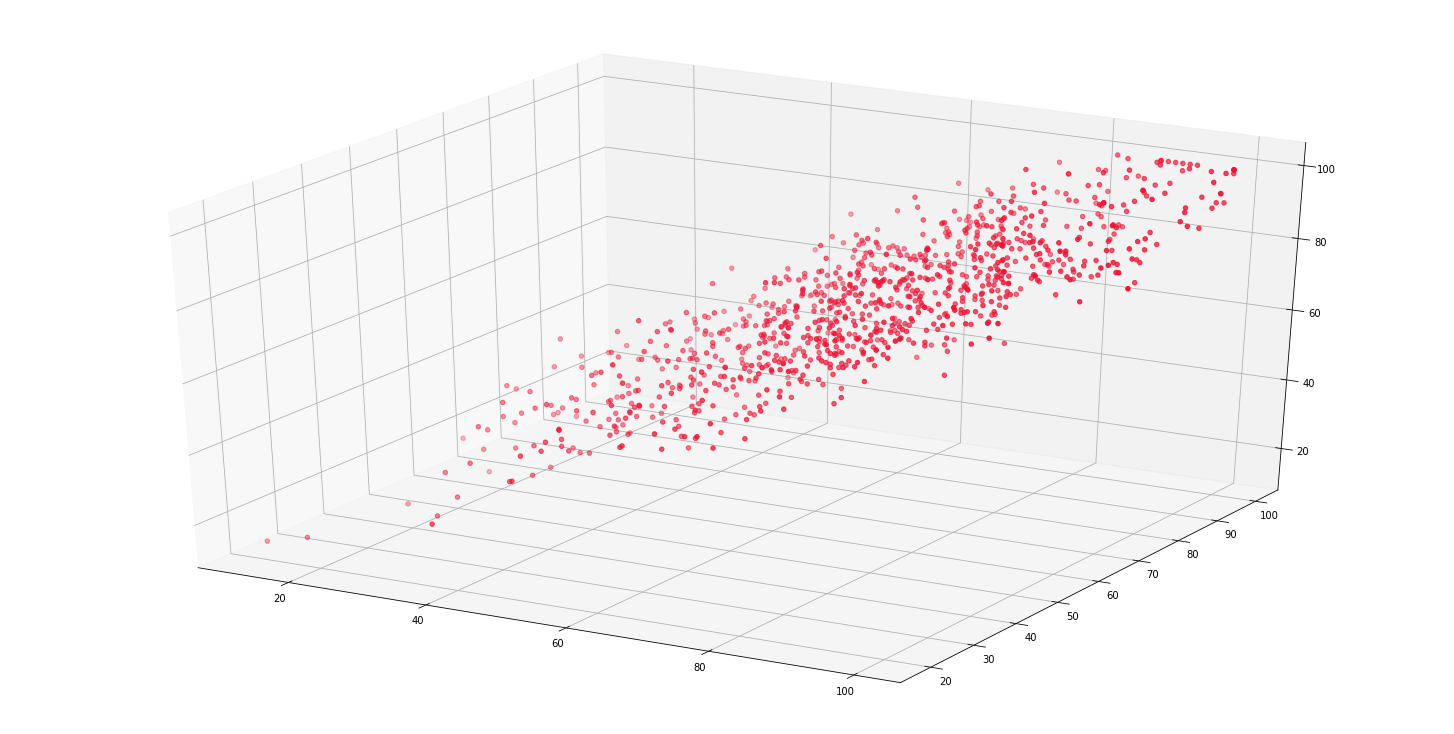

In [3]:
math = data['Math'].values
read = data['Reading'].values
write = data['Writing'].values

# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(math, read, write, color='#ef1234')

plt.show()

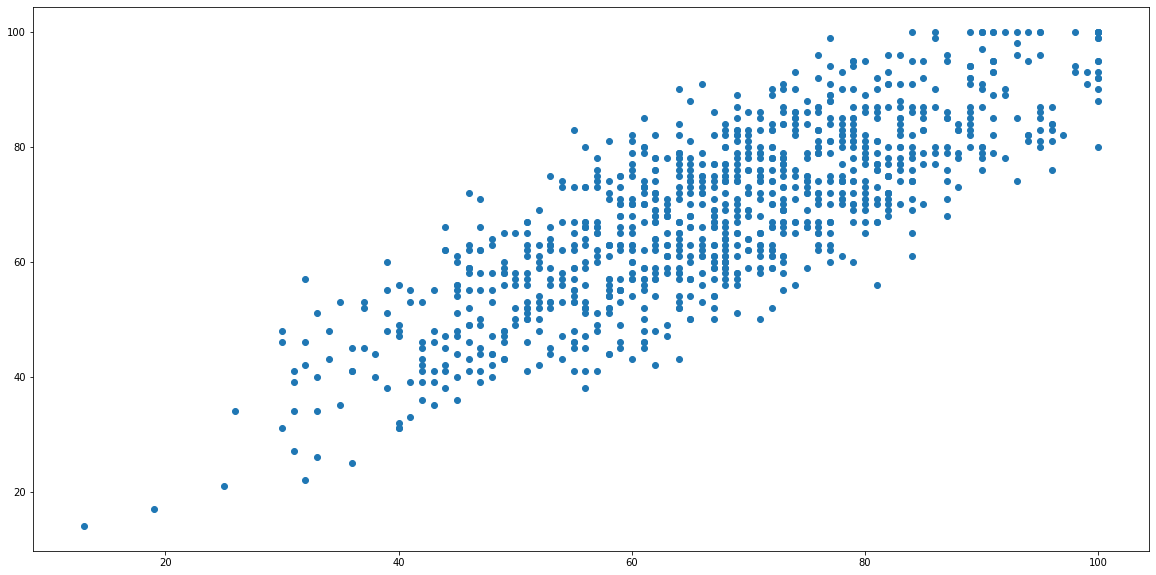

In [4]:
plt.scatter(math,write)

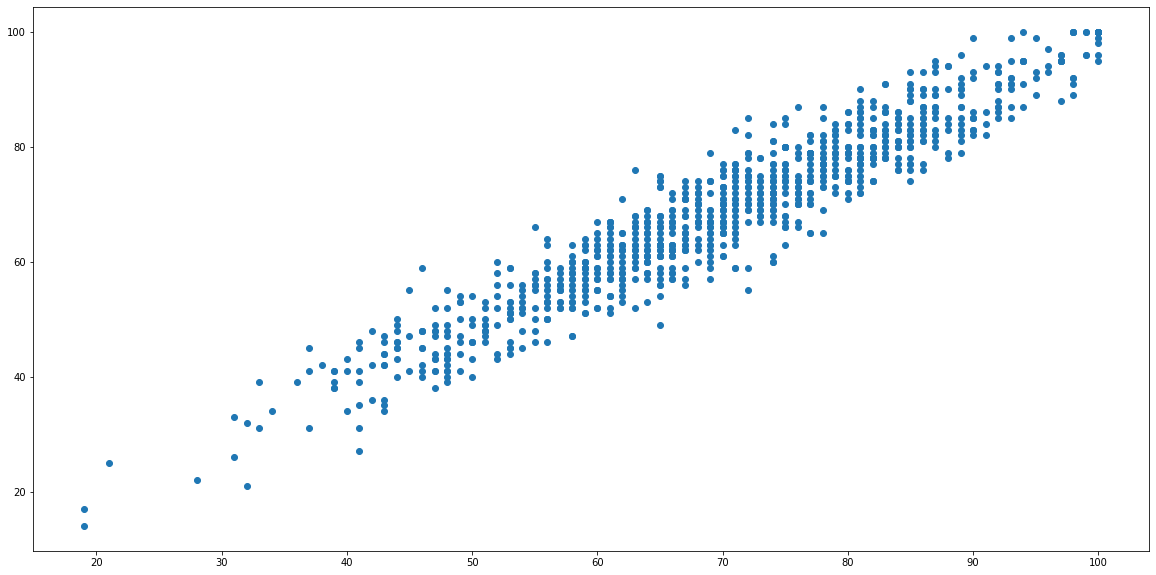

In [5]:
plt.scatter(read,write)

In [6]:
data.corr()

,Math,Reading,Writing
Math,1.000000,0.806469,0.801160
Reading,0.806469,1.000000,0.952226
Writing,0.801160,0.952226,1.000000


In [7]:
np.corrcoef(math,write)[0,1]

0.8011595965718689

In [8]:
np.corrcoef(read,write)[0,1]

0.9522256981148811

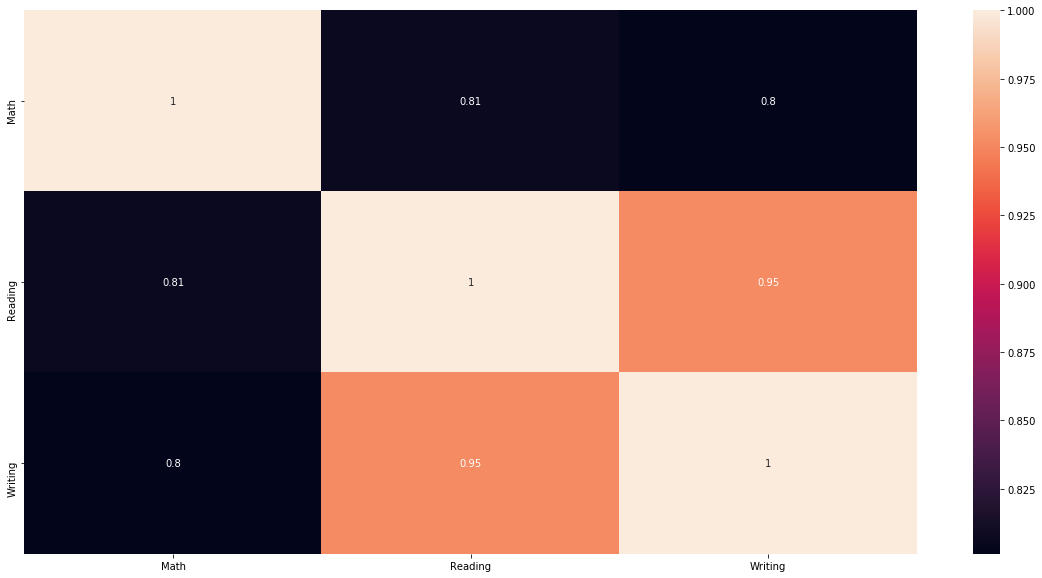

In [9]:
sb.heatmap(data.corr(),annot=True)

In [10]:
#Initial Parameters
m = len(math)
x0 = np.ones(m)
X = np.array([x0, math, read]).T
# Initial Coefficients
B = np.array([0, 0, 0])
Y = np.array(write)
alpha = 0.0001 #learning rate

In [11]:
#Define Cost Function
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [12]:
inital_cost = cost_function(X, Y, B)
print("Initial Cost")
print(inital_cost)

Initial Cost
2470.11


In [13]:
#Gradient Descent Algorithm
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for i in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        #print("Iteration:",i,B)
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[i] = cost
        
    return B, cost_history

In [14]:
# 100000 Iterations
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)
print(newB)
print(min(cost_history))

[-0.47889172  0.09137252  0.90144884]
10.475123473539167


### Using Sci-Kit Learn Machine Learning Package

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# X and Y Values
X = np.array([math, read]).T
Y = np.array(write)

# Model Intialization
reg = LinearRegression()
# Data Fitting
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)

print(rmse)
print(r2)

4.572887051836439
0.9098901726717316


In [16]:
reg.predict([[88,72]])

array([72.54174959])

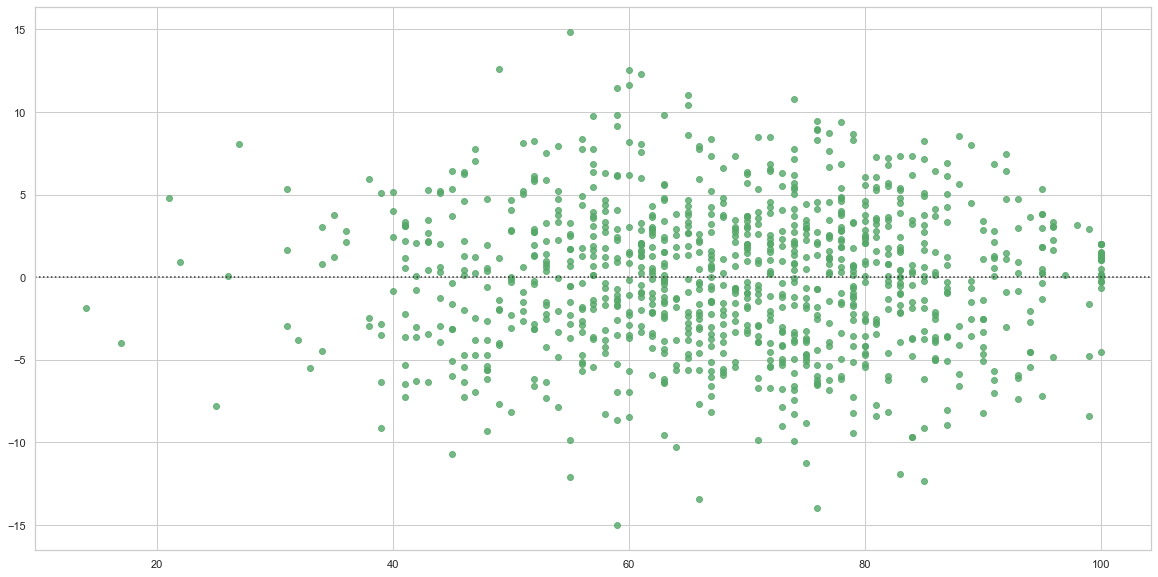

In [17]:
import seaborn as sb
# Plot the residuals after fitting a linear model
sb.set(style="whitegrid")
sb.residplot(Y, Y_pred, color="g")
plt.show()

In [18]:
import statsmodels.api as sm
regressor_OLS = sm.OLS(endog = Y, exog = X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          1.169e+05
Date:                Tue, 28 Jul 2020   Prob (F-statistic):                        0.00
Time:                        12:31:03   Log-Likelihood:                         -2941.1
No. Observations:                1000   AIC:                                      5886.
Df Residuals:                     998   BIC:                                      5896.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0891      0.016      5.601      0.000       0.058       0.120
x2             0.8970      0.015     58.370      0.000       0.867       0.927
==============================================================================
Omnibus:                        0.601   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.740   Jarque-Bera (JB):                0.474
Skew:                          -0.011   Prob(JB):                        0.789
Kurtosis:                       3.104   Cond. No.                         15.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [30]:
X = add_constant(data)

In [31]:
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const      24.937662
Math        2.960544
Reading    11.368520
Writing    11.097569
dtype: float64